# Object Detection 
    ~ face detection of cat and dog

*Note: I have exported model also, you can directly test that, but you have install Object Detection API first or you can go with this code too, i have also test my model here.*

In [1]:
#library
import os

In [13]:
# please import training.zip file that i have provided in my link into this dir,it includes all the necessary files for training our model.
os.chdir('/content/')

!unzip /content/training.zip

Archive:  /content/training.zip
   creating: training/
   creating: training/annotations/
  inflating: training/annotations/label_map.pbtxt  
   creating: training/exported_model/
  inflating: training/generate_tfrecord.py  
   creating: training/images/
 extracting: training/images/cd.zip  
   creating: training/my_model/
   creating: training/pre-trained-model/


# Cloning TFOD 2.0  API (tensorflow Object detection 2.0)

In [3]:
# clone TFOD2.0
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 78544, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 78544 (delta 172), reused 295 (delta 152), pack-reused 78197
Receiving objects: 100% (78544/78544), 593.75 MiB | 35.29 MiB/s, done.
Resolving deltas: 100% (55792/55792), done.


Installing Protocol Buffer because TFOD uses Protocbuf to train the parameters of the model.

In [4]:
# installing protocbuf   
os.chdir('/content/models/research')

!protoc object_detection/protos/*.proto --python_out=.

#Cloining COCO_APi 
    ~it contains classes and metrics



In [5]:
# let's clone cocoapi 
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 35.00 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [6]:
# installing cocoAPI
os.chdir('/content/models/research/cocoapi/PythonAPI')
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [7]:
# copying pycocotools in research dir

!cp -r pycocotools /content/models/research 

#Now let's install Object Detection API

In [8]:
# install Object detection API

#first we  need to copy two files into research dir. i.e packages/setup.py and model_builder_tf2_test.py

# change dir to models/research
os.chdir('/content/models/research')

!cp /content/models/research/object_detection/packages/tf2/setup.py .
!cp /content/models/research/object_detection/builders/model_builder_tf2_test.py .


In [9]:
# now let's install setup
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 52.6 MB/s 
     |████████████████████████████████| 352 kB 65.4 MB/s 
     |████████████████████████████████| 2.2 MB 64.6 MB/s 
     |████████████████████████████████| 25.0 MB 1.3 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 116 kB 66.2 MB/s 
     |████████████████████████████████| 5.9 MB 41.6 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |

In [10]:
# installing second file i.e model_builder so we could use packages of object detection lates

!python model_builder_tf2_test.py

2022-11-07 04:42:16.338638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 04:42:16.534737: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 04:42:17.608841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-07 04:42:17.609113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

# Gettting pre-tranied model.

In [14]:
#get model
os.chdir('/content/training/pre-trained-model')
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-11-07 04:53:20--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.122.128, 2607:f8b0:4004:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.122.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2022-11-07 04:53:20 (196 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [16]:
# extarct model 
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


      We have succesfully installed all the necessary things to train out model.
      

**We have archived images with annotations in the directory which is mentioned below,you just need to run the code without making any changes**

In [17]:
# unzipping images  (we have )
os.chdir('/content/training/images')
!unzip cd.zip

Archive:  cd.zip
   creating: train/
  inflating: train/c (1).jpg         
  inflating: train/c (1).xml         
  inflating: train/c (10).jpg        
  inflating: train/c (10).xml        
  inflating: train/c (11).jpg        
  inflating: train/c (11).xml        
  inflating: train/c (12).jpg        
  inflating: train/c (12).xml        
  inflating: train/c (13).jpg        
  inflating: train/c (13).xml        
  inflating: train/c (14).jpg        
  inflating: train/c (14).xml        
  inflating: train/c (15).jpg        
  inflating: train/c (15).xml        
  inflating: train/c (16).jpg        
  inflating: train/c (16).xml        
  inflating: train/c (17).jpg        
  inflating: train/c (17).xml        
  inflating: train/c (18).jpg        
  inflating: train/c (18).xml        
  inflating: train/c (19).jpg        
  inflating: train/c (19).xml        
  inflating: train/c (2).jpg         
  inflating: train/c (2).xml         
  inflating: train/c (20).jpg        
  inflating: 

# Creating train.record and test.record (train and test set)

In [18]:
# let's make train.record and  test.record

os.chdir('/content/training')

# Create train data:
!python generate_tfrecord.py -x /content/training/images/train -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training/images/test -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/test.record

2022-11-07 04:54:07.150184: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training/annotations/train.record
2022-11-07 04:54:10.588283: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training/annotations/test.record


In [19]:
# copy model_main_tf2.py to training dir
!cp /content/models/research/object_detection/model_main_tf2.py .

#Let's train

In [20]:
 # let's train our model
!python model_main_tf2.py --model_dir=/content/training/my_model --pipeline_config_path=/content/training/my_model/pipeline.config

2022-11-07 04:55:58.368687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 04:55:58.557853: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 04:55:59.367269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-07 04:55:59.367408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

# Exporting model (Infrencing model's graph)

In [29]:
# let's export our model

#copying exporter_main_v2.py to training dir.
!cp /content/models/research/object_detection/exporter_main_v2.py .

In [30]:
# let's export our model
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training/my_model/pipeline.config --trained_checkpoint_dir /content/training/my_model --output_directory /content/training/exported_model

2022-11-07 05:14:09.653825: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 05:14:10.493766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-07 05:14:10.493891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-07 05:14:10.493911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [36]:
# zipping model so we can download it
!zip -r /content/exported.zip  /content/training/exported_model 


  adding: content/training/exported_model/ (stored 0%)
  adding: content/training/exported_model/pipeline.config (deflated 69%)
  adding: content/training/exported_model/checkpoint/ (stored 0%)
  adding: content/training/exported_model/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/training/exported_model/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: content/training/exported_model/checkpoint/checkpoint (deflated 42%)
  adding: content/training/exported_model/saved_model/ (stored 0%)
  adding: content/training/exported_model/saved_model/assets/ (stored 0%)
  adding: content/training/exported_model/saved_model/saved_model.pb (deflated 92%)
  adding: content/training/exported_model/saved_model/variables/ (stored 0%)
  adding: content/training/exported_model/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/training/exported_model/saved_model/variables/variables.index (deflated 78%)


In [37]:
#download extarcted model
from google.colab import files
files.download("/content/exported.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Let's test our Model

In [38]:
#necessary libraries
import cv2
import tensorflow as tf
from object_detection.utils import config_util,label_map_util,visualization_utils as viz 
from object_detection.builders import model_builder
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [39]:
# load saved model

# load config file
config=config_util.get_configs_from_pipeline_file('/content/training/exported_model/pipeline.config')
#get model
detection_model=model_builder.build(config['model'],is_training=False)

#restore checkpoint
chkpt=tf.compat.v2.train.Checkpoint(model=detection_model)
chkpt.restore('/content/training/exported_model/checkpoint/ckpt-0').expect_partial()


#make model
@tf.function   
def detect_fn(img):
  images,shapes=detection_model.preprocess(img)
  predict_dict=detection_model.predict(images,shapes)
  detections=detection_model.postprocess(predict_dict,shapes)
  return detections


#Let's detect faces.

In [40]:
#lets detect objects
category=label_map_util.create_category_index_from_labelmap('/content/training/annotations/label_map.pbtxt')

In [43]:
#Note: images are in /content/training/images 

img_path='/content/training/images/train/d (12).jpg'

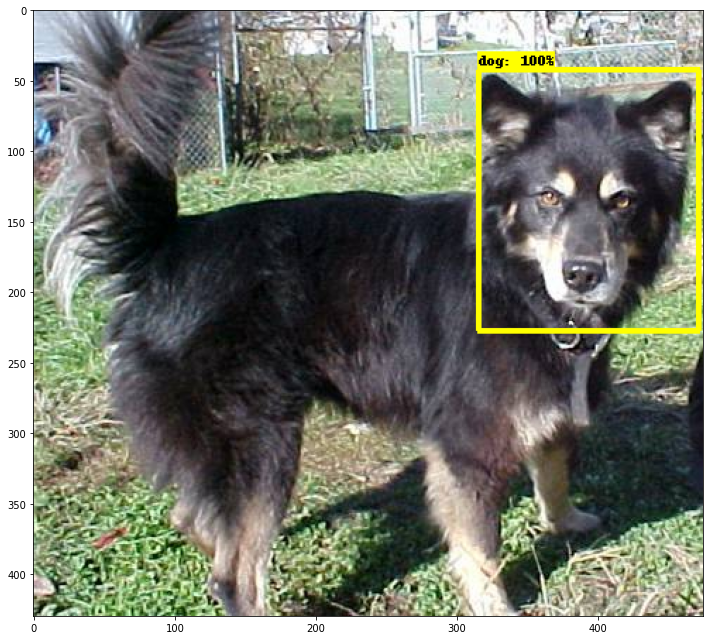

In [44]:
#let's detect
img = cv2.imread(img_path)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.figure(figsize=(12,14))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


    Hooreh!  Working very well.